In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("train_titanic_kaggle.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Clifford, Mr. George Quincy",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Data Exploration

[]

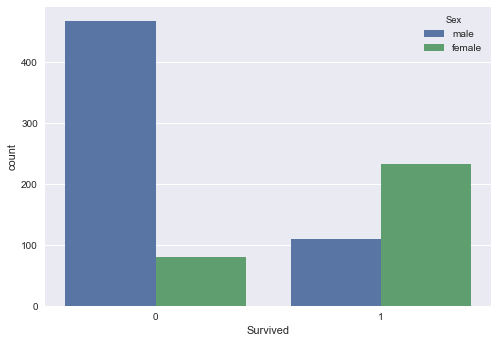

In [6]:
#checking the survival ratio of male and female
plt.style.use("seaborn")
sns.countplot(x = data["Survived"],data = data,hue = data["Sex"])
plt.plot()

<AxesSubplot:xlabel='Pclass', ylabel='count'>

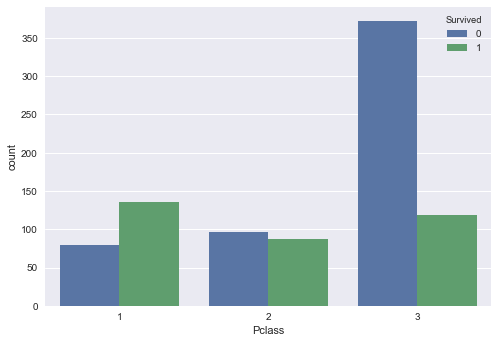

In [7]:
# Survival ratio of differnt passenger class 
sns.countplot(x = data["Pclass"],data = data,hue = data["Survived"])

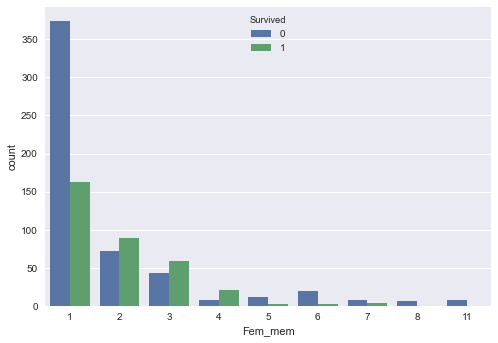

In [8]:
# Survival ratio on the basis of the family
data["Fem_mem"] = data["SibSp"] + data["Parch"] + 1
sns.countplot(x = data["Fem_mem"],hue = data["Survived"],data = data )
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='Age'>

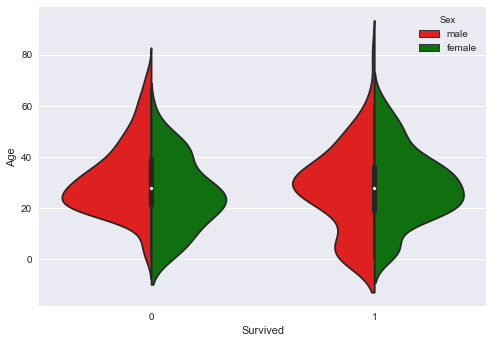

In [9]:
sns.violinplot(x = data["Survived"],y = data["Age"],hue = data["Sex"],data = data,split = True,palette={'male':'r','female':'g'})

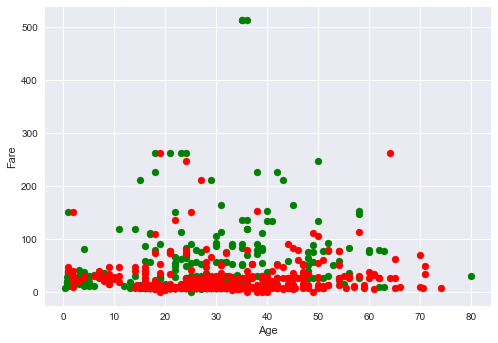

In [10]:
ax = plt.subplot()
ax.scatter(data[data["Survived"]==1]["Age"],data[data["Survived"]==1]["Fare"],
          c = 'green' )
ax.scatter(data[data["Survived"]==0]["Age"],data[data["Survived"]==0]["Fare"],
          c = 'red' )
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

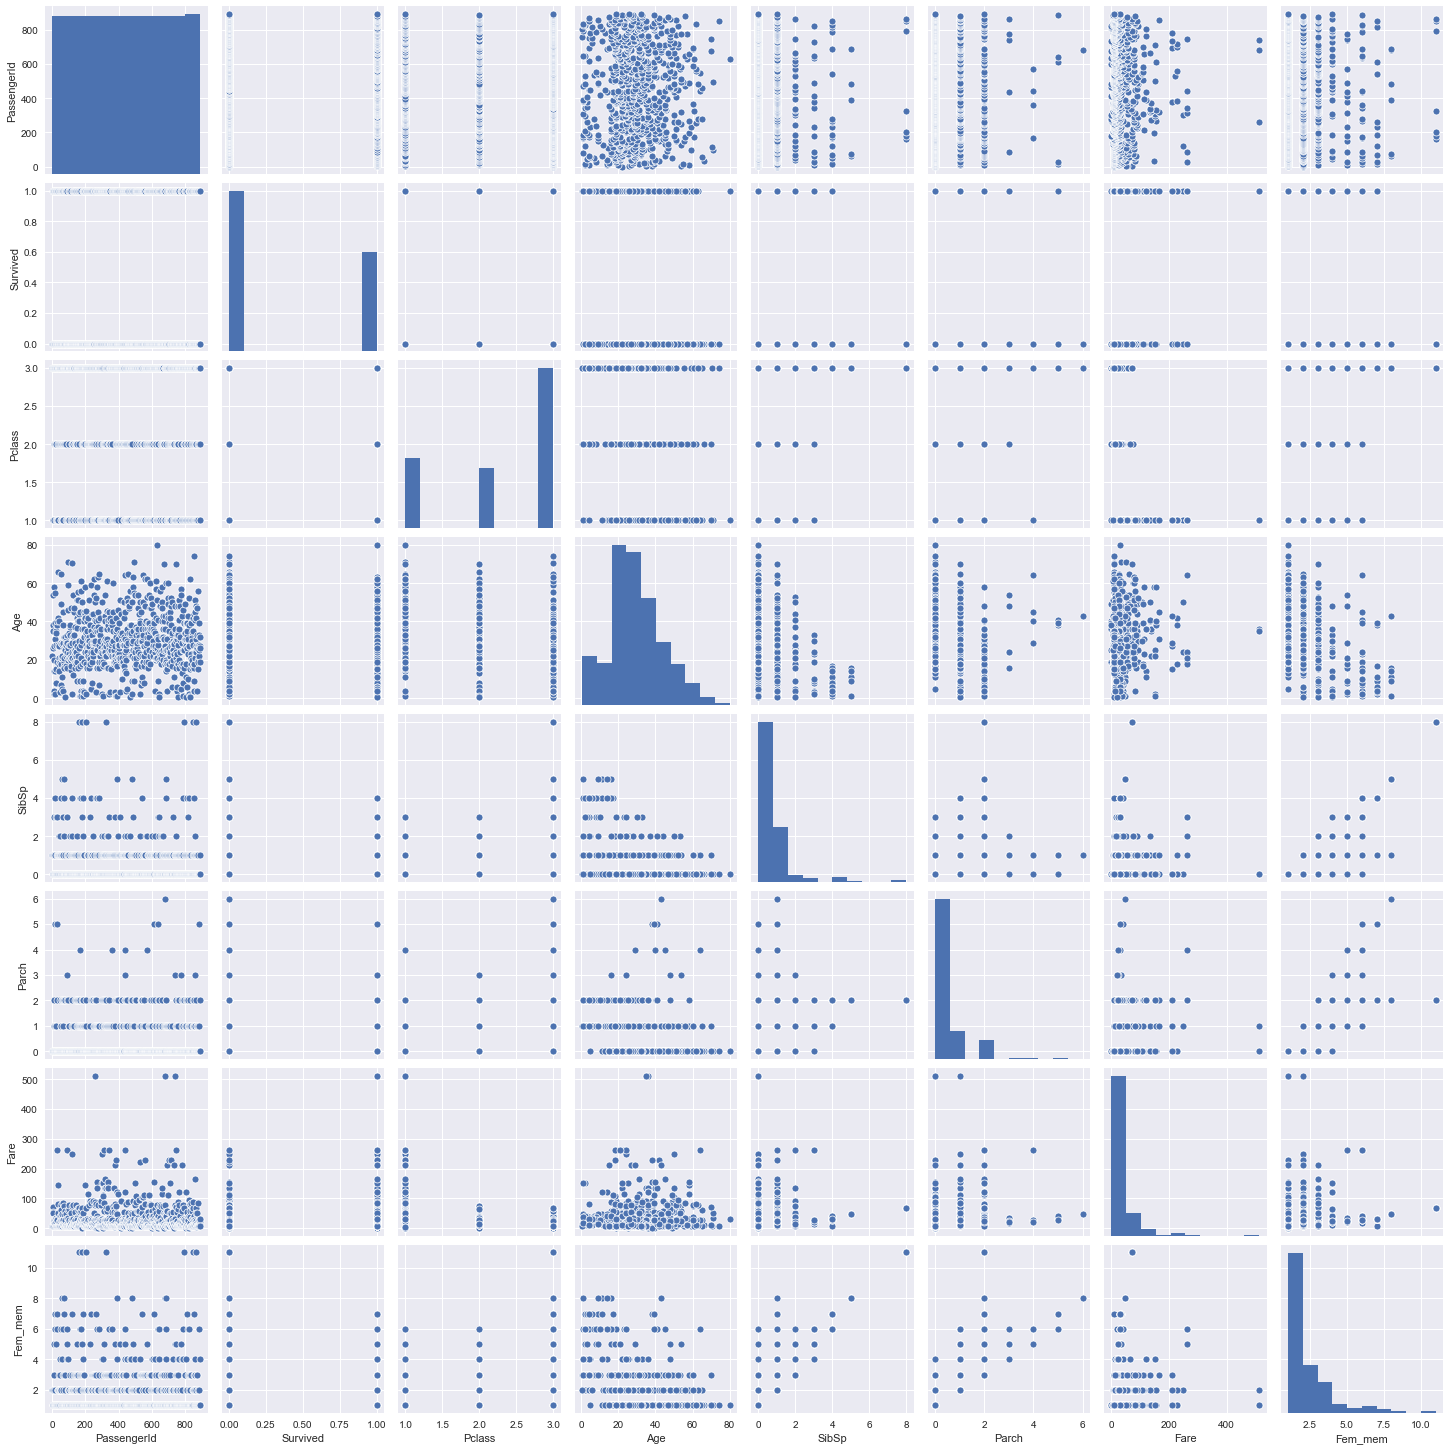

In [11]:
sns.pairplot(data)
plt.show()

### Feature Engineering


In [12]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fem_mem
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [13]:
ID = data["PassengerId"]

In [14]:
data1 = data.drop(["SibSp","Parch","Name","PassengerId","Ticket"],axis = 1)
data1.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Fem_mem
0,0,3,male,22.0,7.2500,NaN,S,2
1,1,1,female,38.0,71.2833,C85,C,2
2,1,3,female,26.0,7.9250,NaN,S,1
3,1,1,female,35.0,53.1000,C123,S,2
4,0,3,male,35.0,8.0500,NaN,S,1


In [15]:
data1["Single"] = data1["Fem_mem"].map(lambda x : 1 if x==1 else 0)
data1["Small_family"] = data1["Fem_mem"].map(lambda x : 1 if 2<=x<=4 else 0)
data1["Large_family"] = data1["Fem_mem"].map(lambda x : 1 if x>4 else 0)

In [16]:
data1["Cabin"].fillna( "U" ,inplace = True)
data1["Cabin"] = data1["Cabin"].map(lambda c:c[0])
data1["Cabin"].value_counts()

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [17]:
data1.drop(["Fem_mem"],axis = 1,inplace = True)
data1.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Single,Small_family,Large_family
0,0,3,male,22.0,7.2500,U,S,0,1,0
1,1,1,female,38.0,71.2833,C,C,0,1,0
2,1,3,female,26.0,7.9250,U,S,1,0,0
3,1,1,female,35.0,53.1000,C,S,0,1,0
4,0,3,male,35.0,8.0500,U,S,1,0,0


In [18]:
data1["Embarked"].fillna('S')

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [19]:
data1 = pd.get_dummies(data1)
data1

,Survived,Pclass,Age,Fare,Single,Small_family,Large_family,Sex_female,Sex_male,Cabin_A,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,1,1,38.0,71.2833,0,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,1,3,26.0,7.9250,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,1,35.0,53.1000,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,3,35.0,8.0500,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
887,1,1,19.0,30.0000,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
888,0,3,NaN,23.4500,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
889,1,1,26.0,30.0000,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0


In [20]:
data1["Age"].fillna(value = data1["Age"].median(),inplace = True)

In [21]:
data1.head()

,Survived,Pclass,Age,Fare,Single,Small_family,Large_family,Sex_female,Sex_male,Cabin_A,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,1,1,38.0,71.2833,0,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,1,3,26.0,7.9250,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,1,35.0,53.1000,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,3,35.0,8.0500,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [22]:
data1.isnull().sum()

Survived        0
Pclass          0
Age             0
Fare            0
Single          0
Small_family    0
Large_family    0
Sex_female      0
Sex_male        0
Cabin_A         0
Cabin_B         0
Cabin_C         0
Cabin_D         0
Cabin_E         0
Cabin_F         0
Cabin_G         0
Cabin_T         0
Cabin_U         0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [23]:
data1 = data1.drop(["Cabin_T"],axis = 1)

### Model Building

In [24]:
x = data1.drop(["Survived"],axis = 1)
y = data1["Survived"]


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x = pd.DataFrame(data = x_scaled,columns = x.columns)
x.head()

,Pclass,Age,Fare,Single,Small_family,Large_family,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.271174,0.014151,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.472229,0.139136,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.321438,0.015469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.434531,0.103644,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.434531,0.015713,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [26]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 50,stratify = y)

### Logistic Regression Model

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lgr = LogisticRegression()
lgr.fit(train_x,train_y)
predict_train1 = lgr.predict(train_x)
k = accuracy_score(train_y,predict_train1)
predict_test1 = lgr.predict(test_x)
m = accuracy_score(test_y,predict_test1)
print(k,m)


0.8263473053892215 0.8161434977578476


### XGBoost model

In [28]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
xgb = XGBClassifier(n_estimators = 300,min_child_weight =  7,learning_rate = 0.3,colsample_bytree = 0.5,
                    max_depth = 5,gamma = 0.5)

In [29]:
para= {  
    "n_estimators":[x for x in range(100,1000,100)],
    " max_depth":[2,3,5,7,8,9,10,12,15],
    " gamma":[0.1,0.2,0.3,0.4,0.5],
    "min_child_weight":[1,3,5,7],
    "colsample_bytree":[0.2,0.3,0.5,0.6,0.8],
    "learning_rate":[0.05,0.1,0.15,0.2,0.25,0.3]
     }

In [30]:
random_search = RandomizedSearchCV(xgb,param_distributions=para,n_iter=5,scoring='roc_auc',n_jobs=-1,verbose=3,cv=5)
random_search.fit(x,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   10.5s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   10.9s finished


[02:18:09] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  gamma,  max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=0.5, gamma=0.5,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.3,
                                           max_delta_step=None, max_depth=5,
                                           min_child_weight=7, missing=nan,
                                           monotone_constraints=None,
                                           n_estimato...
                   param_distributions={' gamma': [0.1, 0.2, 0.3, 0.4, 0.5],
                                        ' max_depth': [2, 3, 5, 7, 8, 9, 10, 12,
                      

In [31]:
random_search.best_params_

{'n_estimators': 700,
 'min_child_weight': 5,
 'learning_rate': 0.1,
 'colsample_bytree': 0.8,
 ' max_depth': 12,
 ' gamma': 0.3}

In [32]:
xgb.fit(train_x,train_y)
predict_train2 = xgb.predict(train_x)
k = accuracy_score(train_y,predict_train2)
predict_test2  =  xgb.predict(test_x)
m  =  accuracy_score(test_y, predict_test2)
print(k,m)

0.8997005988023952 0.8161434977578476


### Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(train_x,train_y)
predict_train3 = dt.predict(train_x)
predict_test3 = dt.predict(test_x)
k = accuracy_score(train_y,predict_train3)
m =  accuracy_score(test_y, predict_test3)
print(k,m)


0.8458083832335329 0.7982062780269058


In [34]:
from statistics import mode
final_predict_train=np.array([])
final_predict_test=np.array([])
for i in range(0,len(train_x)):
    final_predict_train = np.append(final_predict_train,mode([predict_train1[i],predict_train2[i],predict_train3[i]]))
for i in range(0,len(test_x)):
    final_predict_test = np.append(final_predict_test,mode([predict_test1[i],predict_test2[i],predict_test3[i]]))    

In [35]:
k = accuracy_score(train_y,final_predict_train)
k

0.8532934131736527

In [36]:
m = accuracy_score(test_y,final_predict_test)
m

0.8116591928251121

### Preparing Test data

In [37]:
test = pd.read_csv("test _titanic_kaggle.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [59]:
test.shape

(418, 12)

In [38]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Treating missing value

In [39]:
test["Fem_mem"] = test["SibSp"] + test["Parch"] + 1

In [40]:
ID1 = test["PassengerId"]

In [61]:
test1 = test.drop(["SibSp","Parch","Name","PassengerId","Ticket"],axis = 1)
test1.head()


,Pclass,Sex,Age,Fare,Cabin,Embarked,Fem_mem
0,3,male,34.5,7.8292,NaN,Q,1
1,3,female,47.0,7.0000,NaN,S,2
2,2,male,62.0,9.6875,NaN,Q,1
3,3,male,27.0,8.6625,NaN,S,1
4,3,female,22.0,12.2875,NaN,S,3


In [62]:
test1["Single"] = test1["Fem_mem"].map(lambda x : 1 if x==1 else 0)
test1["Small_family"] = test1["Fem_mem"].map(lambda x : 1 if 2<=x<=4 else 0)
test1["Large_family"] = test1["Fem_mem"].map(lambda x : 1 if x>4 else 0)
test1.shape

(418, 10)

In [43]:
test1["Cabin"].fillna( "U" ,inplace = True)
test1["Cabin"] = test1["Cabin"].map(lambda c:c[0])
test1["Cabin"].value_counts()

U    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin, dtype: int64

In [44]:
test1.drop(["Fem_mem"],axis = 1,inplace = True)
test1.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Single,Small_family,Large_family
0,3,male,34.5,7.8292,U,Q,1,0,0
1,3,female,47.0,7.0000,U,S,0,1,0
2,2,male,62.0,9.6875,U,Q,1,0,0
3,3,male,27.0,8.6625,U,S,1,0,0
4,3,female,22.0,12.2875,U,S,0,1,0


In [63]:
test1.shape

(418, 10)

In [45]:
test1 = pd.get_dummies(test1)
test1

,Pclass,Age,Fare,Single,Small_family,Large_family,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,7.8292,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1,3,47.0,7.0000,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1
2,2,62.0,9.6875,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
3,3,27.0,8.6625,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
4,3,22.0,12.2875,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,NaN,8.0500,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
414,1,39.0,108.9000,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
415,3,38.5,7.2500,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
416,3,NaN,8.0500,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1


In [46]:
test1["Age"].fillna(value = test1["Age"].median(),inplace = True)

In [47]:
test1["Fare"].fillna(value = test1["Fare"].median(),inplace = True)

In [64]:
test1.shape

(418, 10)

### Model Building

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(test1)
x = pd.DataFrame(data = x_scaled,columns = test1.columns)
x.head()

,Pclass,Age,Fare,Single,Small_family,Large_family,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.452723,0.015282,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.617566,0.013663,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.5,0.815377,0.018909,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.353818,0.016908,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.287881,0.023984,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [65]:
test1.shape

(418, 10)

In [67]:
predict_final_test1 = lgr.predict(x)
predict_final_test1.shape


(418,)

In [68]:
predict_final_test2  =  xgb.predict(x)
predict_final_test1.shape

(418,)

In [69]:
predict_final_test3 = dt.predict(x)
predict_final_test1.shape

(418,)

In [72]:
predict_final_test=np.array([])
for i in range(0,len(x)):
    predict_final_test = np.append(predict_final_test,mode([predict_final_test1[i],predict_final_test2[i],predict_final_test3[i]]))
predict_final_test.shape

(418,)

In [73]:
ID1.shape,predict_final_test.shape

((418,), (418,))

In [74]:
final = pd.DataFrame({"PassengerId":ID1,"Survived":predict_final_test})
final.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0


In [79]:
final = final.astype('int')
final.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [80]:
final.to_csv('gender_submission',index =  False)